In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

print(tf.__version__)

from scipy.stats import pearsonr, spearmanr
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 20,
})

2.4.0-rc0


In [31]:
from importlib import reload

In [45]:
import CNN_classifier_module

In [46]:
reload(CNN_classifier_module)

<module 'CNN_classifier_module' from '/Users/birsigler/projects/ML/notebooks/CNN_classifier/CNN_classifier/CNN_classifier_module.py'>

In [ ]:
reduces = np.linspace(0,.5,10)
N_epochs = 2000
Losses = np.zeros((reduces.shape[0],N_epochs))
ValLosses = np.zeros((reduces.shape[0],N_epochs))
Accuracies = np.zeros((reduces.shape[0],N_epochs))
ValAccuracies = np.zeros((reduces.shape[0],N_epochs))
for i, reduce in enumerate(reduces):
    with CNN_classifier_module.CNN_classifier() as cnn:
        cnn.prepareData()
        cnn.reduceFeatures(reduce)
        cnn.CNN()
        %time cnn.training(N_epochs,False)
        Losses[i], ValLosses[i] = cnn.hist.history['loss'], cnn.hist.history['val_loss']
        Accuracies[i], ValAccuracies[i] = cnn.hist.history['accuracy'], cnn.hist.history['val_accuracy']
        #np.save('results_reducedData',[Losses,ValLosses,Accuracies,ValAccuracies])

In [50]:
Losses,ValLosses,Accuracies,ValAccuracies = np.load('results_reducedData.npy')

Text(0, 0.5, 'accuracy')

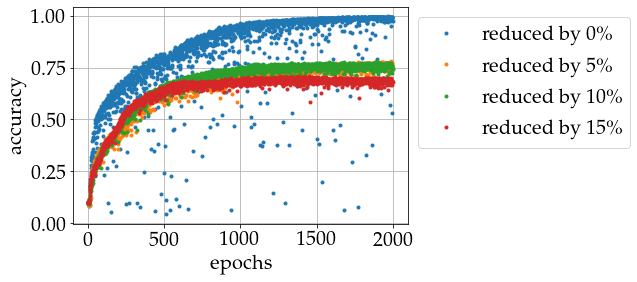

In [58]:
plt.plot(ValAccuracies[0],'.',label='reduced by 0\%');
plt.plot(ValAccuracies[1],'.',label='reduced by 5\%');
plt.plot(ValAccuracies[2],'.',label='reduced by 10\%');
plt.plot(ValAccuracies[3],'.',label='reduced by 15\%');
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')